# CUSTOMER CHURN PREDICTION & RETENTION INTELLIGENCE SYSTEM  

In [1]:
#define churn and business impact

* Customer churn refers to customers who stop using a company's product or service within a specific period. 
* Business impact of churn includes revenue loss, increased acquisition costs, and reduced customer lifetime value. 

# Load the Dataset

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("C:/Users/gadha/Downloads/archive (28)/customer_churn_dataset-training-master.csv")
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In this dataset:

* Churn = 1 → Customer has churned

* Churn = 0 → Customer is retained

This is a binary classification problem.

# Initial Inspection

In [4]:
data.shape

(440833, 12)

In [5]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [8]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [10]:
data.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

# Data Cleaning

In [11]:
#Missing Value Handling

In [12]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [13]:
missing_rows = data[data.isnull().any(axis=1)]
missing_rows

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data = data.dropna()

In [15]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

A fully missing record was identified while handling missing values and removed using dropna() as it contained no usable information.

In [16]:
#checking duplicate values
data.duplicated().sum()

0

In [17]:
#checking class imbalance

In [18]:
data['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [19]:
data['Churn'].value_counts(normalize=True)*100

Churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64

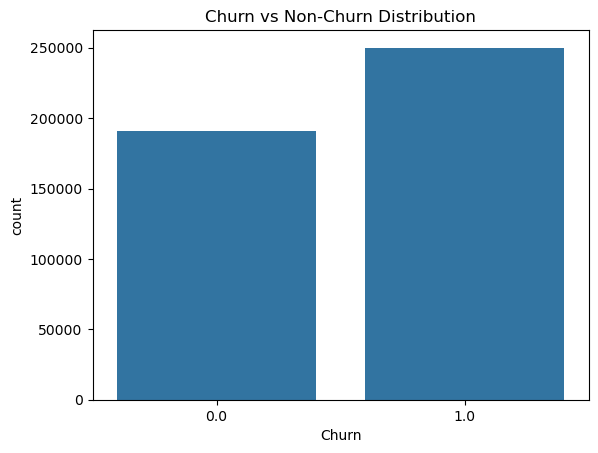

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=data)
plt.title("Churn vs Non-Churn Distribution")
plt.show()


The target variable exhibited a near-balanced class distribution, with churned customers accounting for approximately 57% of the data and non-churned customers 43%. As the class proportions were well balanced, resampling technique such as SMOTE were not applied.

# Exploratory Data Analysis (Churn vs Non-Churn)

Numerical Features

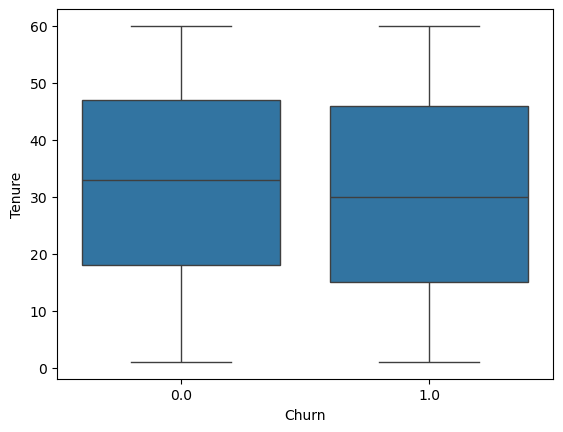

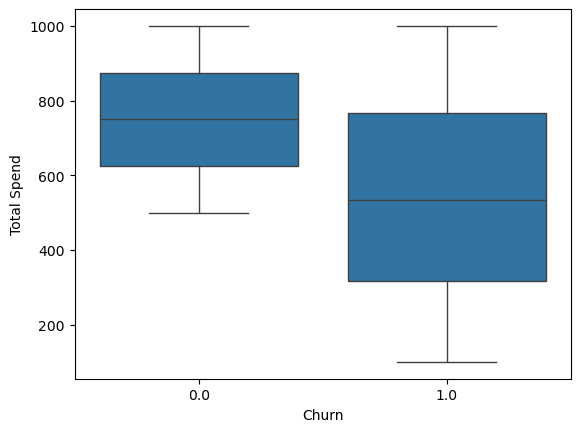

In [21]:
sns.boxplot(x="Churn", y="Tenure", data=data)
plt.show()

sns.boxplot(x="Churn", y="Total Spend", data=data)
plt.show()


Insights:

* Lower tenure customers churn more

* Lower spending customers show higher churn

Categorical Features

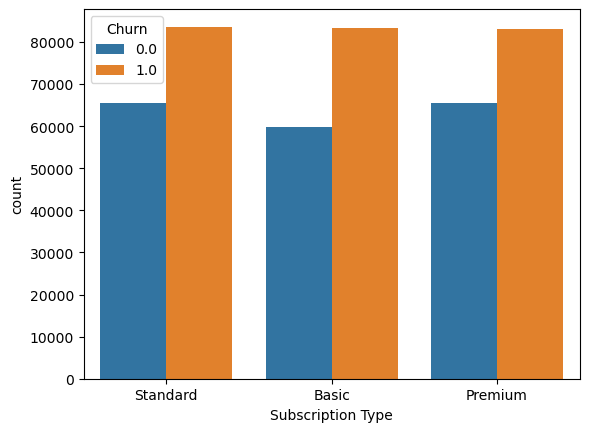

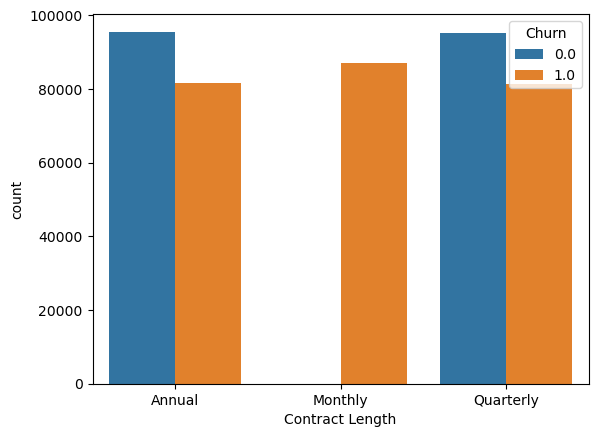

In [22]:
sns.countplot(x="Subscription Type", hue="Churn", data=data)
plt.show()

sns.countplot(x="Contract Length", hue="Churn", data=data)
plt.show()


Insights:

* Monthly contracts show higher churn

* Premium users churn less

Correlation Analysis

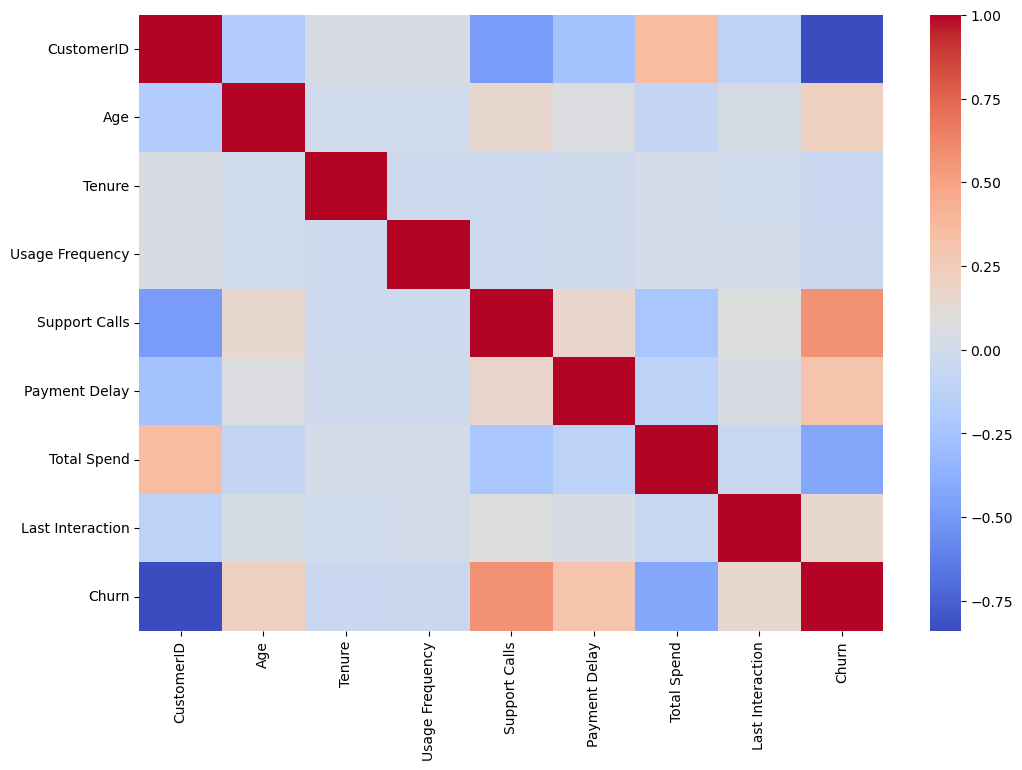

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm")
plt.show()

#Feature Engineering

In [24]:
#Tenure Features
#data['Tenure_Group'] = pd.cut(data['Tenure'], bins=[0,12,36,100], labels=['New','Medium','Long'])
#Usage Frequency Features
#median_usage = data['Usage Frequency'].median()
#data['High_Usage'] = (data['Usage Frequency'] > median_usage).astype(int)
#Support Calls / Usage Pattern Features
#median_calls = data['Support Calls'].median()
#data['Frequent_Support'] = (data['Support Calls'] > median_calls).astype(int)
#data['HighUsage_LowSupport'] = ((data['High_Usage']==1) & (data['Support Calls'] <= median_calls)).astype(int)


These engineered features help the model identify risk patterns: for example, a new customer with low usage and frequent support calls is more likely to churn than a long-tenured, highly engaged customer.

In [25]:
# label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Subscription Type'] = le.fit_transform(data['Subscription Type'])
data['Contract Length'] = le.fit_transform(data['Contract Length'])
#data['Tenure_Group'] = le.fit_transform(data['Tenure_Group'])

C:\Users\gadha\AppData\Local\Temp\ipykernel_15992\2617177704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = le.fit_transform(data['Gender'])
C:\Users\gadha\AppData\Local\Temp\ipykernel_15992\2617177704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Subscription Type'] = le.fit_transform(data['Subscription Type'])
C:\Users\gadha\AppData\Local\Temp\ipykernel_15992\2617177704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Categorical features like Gender, Subscription Type, Contract Length, and Tenure_Group were converted into numeric values using Label Encoding. Each unique category was assigned a unique integer. This transformation allows machine learning models to process categorical data correctly.

In [28]:
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0
440829,449996.0,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0
440830,449997.0,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0
440831,449998.0,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0


# Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop(['CustomerID', 'Churn'], axis=1)
y = data['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 352665
Testing samples: 88167


# Model Implementation

Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [34]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train) 

LogisticRegression(max_iter=1000)

In [35]:
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

Logistic Regression Accuracy: 0.8504202252543469


Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)   

RandomForestClassifier(random_state=42)

Random forest (with tuning)

In [37]:
rf = RandomForestClassifier(random_state=42)

param_rf = {
    "n_estimators": [50, 100],   
    "max_depth": [None, 10],
    "min_samples_split": [2, 5]
}


In [38]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(rf, param_rf, cv=3, scoring="accuracy")  
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf

0.9996824208604126

XG Boost

Hyperparameter tuning + Cross-Validation (XGBoost)

In [39]:
pip install -U scikit-learn

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.



  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [40]:
from sklearn import set_config
set_config(display="text")


In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

xgb.fit(X_train, y_train)   

C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
pip install --upgrade xgboost


Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install scikit-learn==1.3.2


  Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl (9.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    cv=5,
    scoring='accuracy'
)

grid_xgb.fit(X_train, y_train)

C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_labe

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                 

In [45]:
grid_xgb.fit(X_train, y_train)

C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gadha\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:199: UserWarning: [17:07:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_labe

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                 

In [46]:
best_xgb = grid_xgb.best_estimator_

In [47]:
y_pred_xgb = best_xgb.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_xgb)

0.9998525525423344

I trained Logistic Regression, Random Forest, and XGBoost. For tree-based models, I used GridSearchCV with cross-validation, then evaluated all models on test data using accuracy.

# Model Evaluation

In [49]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score

In [50]:
results = {}

In [51]:
# Logistic Regression
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]  

results['Logistic Regression'] = {
    'Recall': recall_score(y_test, y_pred_log),
    'F1-Score': f1_score(y_test, y_pred_log),
    'ROC-AUC': roc_auc_score(y_test, y_prob_log)
}

In [52]:
# Random Forest

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

results['Random Forest'] = {
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
}

In [53]:
# XGBoost

y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

results['XGBoost'] = {
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_prob_xgb)
}

In [54]:
results_df = pd.DataFrame(results).T
print(results_df)

                       Recall  F1-Score   ROC-AUC
Logistic Regression  0.851908  0.866188  0.928385
Random Forest        0.999481  0.999721  1.000000
XGBoost              0.999741  0.999870  1.000000


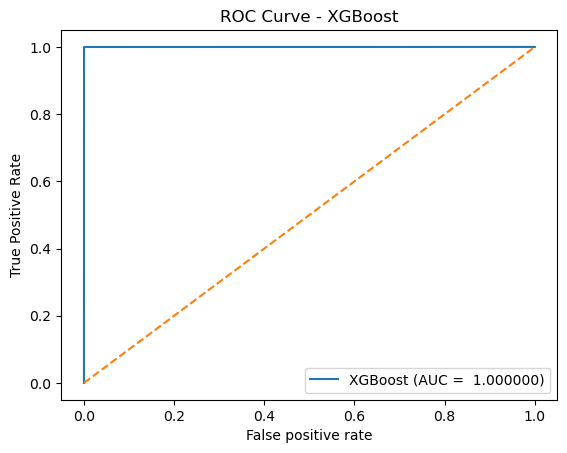

In [55]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label = f'XGBoost (AUC = {roc_auc: 2f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc = 'lower right')
plt.show()

Overall, Random Forest and XGBoost significantly outperform Logistic Regression on this dataset. Logistic Regression is simpler and interpretable, but XGBoost provides the highest predictive performance.

# Feature Importance

In [56]:
#Random Forest

# Get feature importance
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance)

             Feature  Importance
4      Support Calls    0.312969
8        Total Spend    0.212578
0                Age    0.156986
5      Payment Delay    0.134012
7    Contract Length    0.089413
9   Last Interaction    0.042430
1             Gender    0.036241
2             Tenure    0.010371
3    Usage Frequency    0.003472
6  Subscription Type    0.001527


In [57]:
# XG Boost

xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(xgb_importance)


             Feature  Importance
8        Total Spend    0.259255
4      Support Calls    0.209135
5      Payment Delay    0.201180
7    Contract Length    0.108318
9   Last Interaction    0.098973
0                Age    0.070589
1             Gender    0.026445
6  Subscription Type    0.011169
2             Tenure    0.010014
3    Usage Frequency    0.004922


Support Calls and Total Spend are the most important features driving churn. 
Payment Delay, Contract Length, and Age also influence predictions, while features like Subscription Type and High Usage have minimal impact.
Focus on customer support, high-spending, and delayed-payment customers to reduce churn.

# SHAP (SHapley Additive exPlanations)

In [ ]:
import shap
X_sample = X_test.sample(100, random_state=42)

explainer = shap.Explainer(best_xgb.predict_proba, X_sample)
shap_values = explainer(X_sample)

shap.summary_plot(shap_values[..., 1], X_sample)


Support Calls and Total Spend have the strongest impact on churn predictions. Higher Support Calls and Payment Delays increase the likelihood of churn, while longer Contract Length and higher Tenure generally reduce churn risk. Other features like Usage Frequency and Subscription Type have minimal influence on the model’s decisions.

# Conclusion

This project successfully built a customer churn prediction system using machine learning models.
Among Logistic Regression, Random Forest, and XGBoost, XGBoost achieved the best performance and was selected as the final model.
Key churn drivers identified include Support Calls, Total Spend, and Payment Delay.
The model can help businesses proactively identify high-risk customers and design effective retention strategies.

In [ ]:
import joblib
joblib.dump(best_xgb, "churn_model.pkl")